In [1]:
import os
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import interpolate

In [2]:
file1 = 'Result_2010_CMU1.csv'
file2 = 'Height.csv'
#print(os.path.exists(file1),os.path.exists(file2))
h = pd.read_csv(file1)
H = pd.read_csv(file2)

In [3]:
h[['DOY','H-m']]
h['Date'] = pd.to_datetime(2010 * 1000 + h['DOY'], format='%Y%j')
h.index = pd.to_datetime(h['Date'], format = '%Y-%m-%d')
h['CMU1'] = h['H-m']
h

,DOY,X-m,Y-m,Z-m,SDx,SDy,SDz,E-m,N-m,H-m,Unnamed: 10,Date,CMU1
Date,,,,,,,,,,,,,
2010-01-01,1,-938078.1862,5.968374e+06,2.038404e+06,0.0021,0.0044,0.0017,492872.7029,2.074371e+06,308.8713,1.0,2010-01-01,308.8713
2010-01-02,2,-938078.1814,5.968374e+06,2.038404e+06,0.0020,0.0044,0.0017,492872.6990,2.074371e+06,308.8669,2.0,2010-01-02,308.8669
2010-01-03,3,-938078.1841,5.968374e+06,2.038404e+06,0.0020,0.0045,0.0017,492872.7003,2.074371e+06,308.8745,3.0,2010-01-03,308.8745
2010-01-04,4,-938078.1848,5.968374e+06,2.038404e+06,0.0020,0.0044,0.0017,492872.7009,2.074371e+06,308.8777,4.0,2010-01-04,308.8777
2010-01-05,5,-938078.1793,5.968374e+06,2.038404e+06,0.0020,0.0043,0.0017,492872.6962,2.074371e+06,308.8706,5.0,2010-01-05,308.8706
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-10-05,278,-938078.1560,5.968374e+06,2.038404e+06,0.0021,0.0045,0.0018,492872.6717,2.074371e+06,308.8662,252.0,2010-10-05,308.8662
2010-10-06,279,-938078.1543,5.968374e+06,2.038404e+06,0.0021,0.0045,0.0017,492872.6713,2.074371e+06,308.8568,253.0,2010-10-06,308.8568
2010-10-07,280,-938078.1636,5.968374e+06,2.038404e+06,0.0022,0.0047,0.0018,492872.6808,2.074371e+06,308.8565,254.0,2010-10-07,308.8565


In [4]:
H.dropna(how='all', axis=1, inplace=True)
H.index = pd.to_datetime(H['Date'], format = '%Y-%m-%d')
#H[~H['Unnamed: 24'].isnull()]
H

,id,Date,CPN1,CMU1,KMI1,PTC1,SISK,UDON,STSH,MATP,Unnamed: 24
Date,,,,,,,,,,,
2005-01-01,1,2005-01-01,9.1465,308.8972,10.8506,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-02,2,2005-01-02,9.1478,308.8914,10.8488,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-03,3,2005-01-03,NaN,NaN,10.8509,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04,4,2005-01-04,9.1504,308.8911,10.8540,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-05,5,2005-01-05,9.1448,308.8916,10.8489,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2010-10-12,285,2010-10-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-13,286,2010-10-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-14,287,2010-10-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(12784.0, 14975.0)

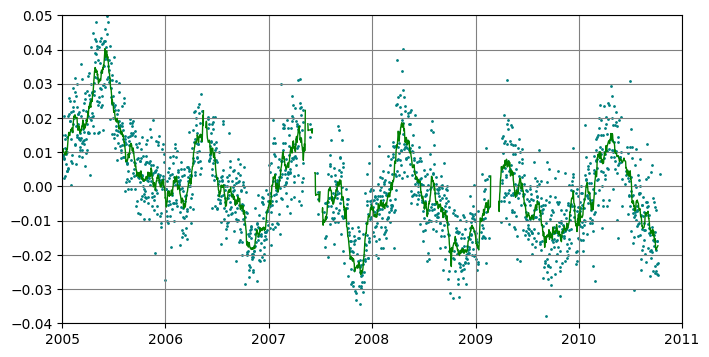

In [5]:
cmu=pd.concat([H['CMU1'], h['CMU1']], axis=0)
cmu = cmu.to_frame()
mean=cmu['CMU1'].mean()
cmu['demean'] = cmu['CMU1']-mean
day =15
cmu['SMA'] = cmu.CMU1.rolling(day, min_periods=1).mean()
cmu['SMA_demean'] = cmu.demean.rolling(day, min_periods=1).mean()
fig, ax1 = plt.subplots(figsize=(8,4))
#plt.scatter(cmu.index,cmu.CMU1,s=1,c='b')
#plt.plot(cmu.index- timedelta(days=day/2),cmu.SMA,lw=1,c='k')
plt.scatter(cmu.index,cmu.demean,s=1,c='teal')
plt.plot(cmu.index- timedelta(days=day/2),cmu.SMA_demean,lw=1,c='green')
plt.grid(color='gray')
plt.ylim(-0.04,0.05)
plt.xlim(datetime(2005,1,1),datetime(2011,1,1))
#cmu

In [6]:
file3='/data/chanin/CHTO_00_2003_2022/STR_2_8s_REF_1/03/005_DAYS/dvv_SMA30_IU.CHTO.00_IU.CHTO.00_coeff0.4.csv'
CHTO = pd.read_csv(file3)
CHTO.index = pd.to_datetime(CHTO['Unnamed: 0'], format = '%Y-%m-%d')
file4='/data/chanin/CHTO_00_2003_2022/STR_2_8s_REF_2/03/005_DAYS/dvv_SMA30_IU.CHTO.00_IU.CHTO.00_coeff0.4.csv'
CHTO2 = pd.read_csv(file4)
CHTO2.index = pd.to_datetime(CHTO2['Unnamed: 0'], format = '%Y-%m-%d')
file='/data/chanin/CHTO_00_2003_2022/STR_2_8s_REF_a/03/005_DAYS/dvv_SMA30_IU.CHTO.00_IU.CHTO.00_coeff0.4.csv'
CHTO3 = pd.read_csv(file)
CHTO3.index = pd.to_datetime(CHTO3['Unnamed: 0'], format = '%Y-%m-%d')

In [7]:
file = '/data/chanin/CHTO_10_2006_2022/STR_2_8s_r2007/03/015_DAYS/dvv_SMA30_IU.CHTO.10_IU.CHTO.10_coeff0.4.csv'
CHTO10 = pd.read_csv(file)
CHTO10.index = pd.to_datetime(CHTO10['Unnamed: 0'], format = '%Y-%m-%d')
file = '/data/chanin/CHTO_10_2006_2022/STR_2_8s_r2018/03/015_DAYS/dvv_SMA30_IU.CHTO.10_IU.CHTO.10_coeff0.4.csv'
CHTO10_1 = pd.read_csv(file)
CHTO10_1.index = pd.to_datetime(CHTO10_1['Unnamed: 0'], format = '%Y-%m-%d')
file = '/data/chanin/CHTO_10_2006_2022/STR_2_8s_rall/03/015_DAYS/dvv_SMA30_IU.CHTO.10_IU.CHTO.10_coeff0.4.csv'
CHTO10_a = pd.read_csv(file)
CHTO10_a.index = pd.to_datetime(CHTO10_a['Unnamed: 0'], format = '%Y-%m-%d')

In [8]:
file='G135.csv'
G135 = pd.read_csv(file)
G135.index = pd.to_datetime(G135['Date'], format = '%d/%m/%Y')
file='Q49.csv'
Q49 = pd.read_csv(file)
Q49.index = pd.to_datetime(Q49['Date'], format = '%d/%m/%Y')

In [9]:
#Q49

In [10]:
def grundwater(well,gw_all):
    #gw_all = gw_all.loc[(gw_all.index < datetime. strptime('2023-01-01','%Y-%m-%d'))]
    #gw_all = gw_all.loc[(gw_all.index > datetime. strptime('2003-01-01','%Y-%m-%d'))]
    
    ww = gw_all[gw_all[well] != '-']
    x = mdates.date2num(ww.index)
    y = ww[well]
    xx = np.linspace(x.min(), x.max(), 300)
    #xx = np.linspace(x.min(), x.max(), 3544)
    dd = mdates.num2date(xx)
    fc = interpolate.interp1d(x, y, kind='cubic')
    ync = fc(xx)
    return pd.to_numeric(ww[well]),dd,ync

In [11]:
mdates.date2num(datetime(2004,1,1))

12418.0

In [12]:
gw_all = pd.read_csv('CMLP.csv')
gw_all['date'] =  pd.to_datetime(gw_all['date'], format='%m/%d/%Y')
gw_all = gw_all.drop(columns=['no'])
gw_all.index = gw_all['date']
gw_all.dropna(how='all', axis=1, inplace=True)

In [33]:
rain = pd.read_csv('rain_gwl_2003_2022.csv')
rain.index = pd.to_datetime(rain['date'], format = '%Y-%m-%d')

In [34]:
rain

,Unnamed: 0,date,r_mm,gwlout_mm,gwl
date,,,,,
2003-01-01,0,2003-01-01,5.4,-21.600000,6.978400
2003-01-02,1,2003-01-02,0.8,-24.690120,6.975310
2003-01-03,2,2003-01-03,0.0,-24.564521,6.975435
2003-01-04,3,2003-01-04,0.0,-24.439561,6.975560
2003-01-05,4,2003-01-05,11.4,-69.915237,6.930085
...,...,...,...,...,...
2022-12-27,7300,2022-12-27,0.0,-3911.428268,3.088572
2022-12-28,7301,2022-12-28,0.0,-3891.530766,3.108469
2022-12-29,7302,2022-12-29,0.0,-3871.734483,3.128266


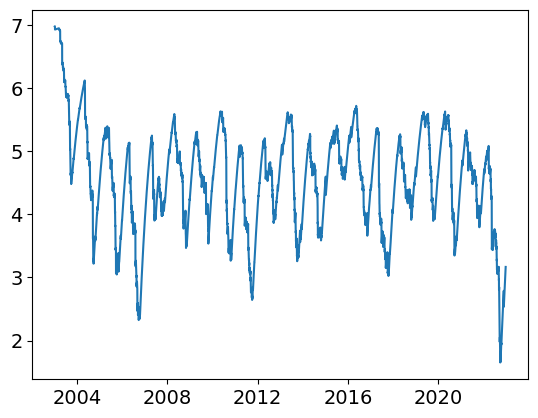

In [36]:
plt.plot(rain['gwl'])

In [68]:
#Transfer precipitation to GWL
#by eq: GWL(t_i) = GWL0 - sum{p(t_n)*exp[a(t_n-t_i)]}/phi (Sens-Schonfelder and Wegler, 2006))
a= 0.0021
phi=0.25
gwl0=0
gwl=[]
for i in rain.index:
    temp_sum=0
    for j in range(i+1):
        temp_sum += rain.r_mm[j]*np.exp(a*(j-i))
    gwl.append(gwl0-temp_sum/phi)
    #print(i,gwl[i])
print('FINISH')

FINISH


In [69]:
rain['gwlout_mm'] = gwl
rain['gwl4'] = rain['gwlout_mm']/1000+7
#rain.date = pd.to_datetime(rain['date'], format = '%Y-%m-%d')

In [32]:
rain.to_csv('rain_gwl_2003_2022.csv',index=True)

In [16]:
def demean_common(CHTO):
    m = CHTO.loc['2008-01-01':'2016-01-01', 'SMA'].mean()
    return CHTO['SMA']-m

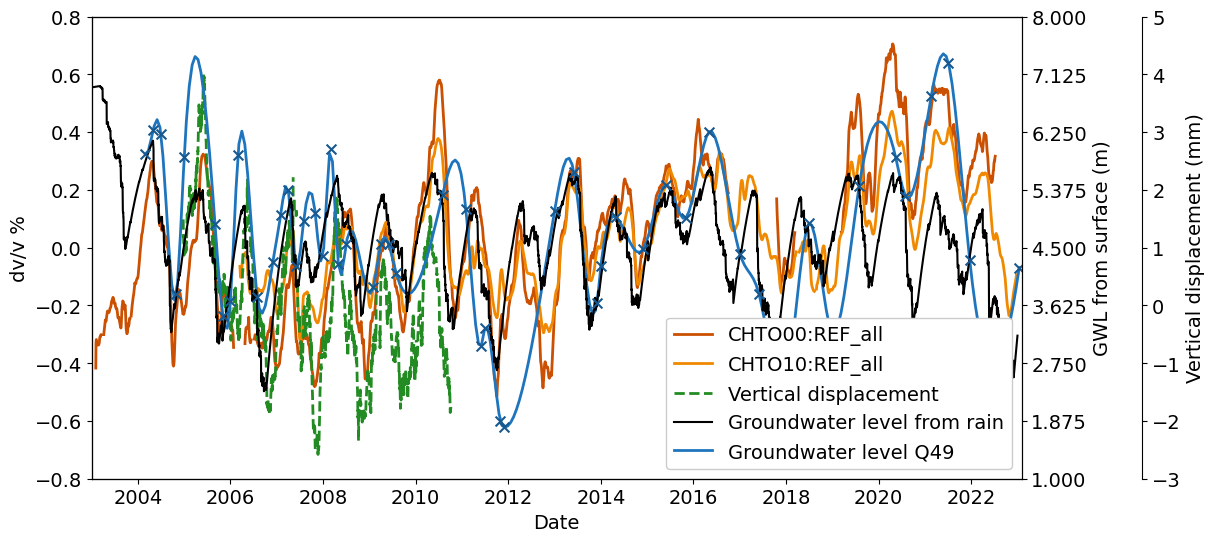

In [47]:
plt.rcParams['font.size'] = 14
fig, ax1 = plt.subplots(figsize=(12,6))
#plt.scatter(cmu.index,cmu.demean,s=0.1,c='r')

#ax1.plot(CHTO.index- timedelta(days=day/2),demean_common(CHTO),lw=1,c='tomato',label ='00:REF2004-2006')
#ax1.plot(CHTO2.index- timedelta(days=day/2),demean_common(CHTO2),lw=1,c='g',label ='00:REF2012-2014')
c0,c1,c2,c3,c4 ='#cb5001','#f08900','forestgreen','#1e75bd','#17588f'
#'#f34654'
ax2 = ax1.twinx()
ax2.plot(cmu.index- timedelta(days=day/2),cmu.SMA_demean*100,lw=2,c=c2,linestyle = 'dashed',label='Vertical displacement')
ax1.plot(CHTO3.index- timedelta(days=day/2),demean_common(CHTO3),lw=2,c=c0,label ='CHTO00:REF_all')
ax1.plot(CHTO10_a.index- timedelta(days=day/2),demean_common(CHTO10_a),lw=2,c=c1,label ='CHTO10:REF_all')
ax1.set_ylabel('dv/v %')
ax1.set_xlabel('Date')
plt.xlim(datetime(2003,1,1),datetime(2023,2,1))
#plt.xlim(datetime(2005,1,1),datetime(2010,12,1))
ax1.set_ylim(-0.8,0.8)
ax1.set_yticks(np.linspace(-0.8,0.8,9))

ax3 = ax1.twinx()
#ax4 = ax1.twinx()

ax3.plot(rain['gwl'],color='k',label ='Groundwater level from rain') #0.0051
#ax3.plot(rain.date,rain['gwl2']+1,color='r',label ='Groundwater level from rain 0.0041')
#ax3.plot(rain.date,rain['gwl3'],color='b',label ='Groundwater level from rain 0.011')
#ax3.plot(rain.date,rain['gwl4']+4,color='b',label ='Groundwater level from rain 0.0021')
ax3.set_ylim(1,8)
'''
well ='G135'
color='blue'
gw,dd,ync = grundwater(well,gw_all)
ax3.plot(dd, ync,color,linewidth=2,label='Groundwater level %s'%well,zorder=1)
ax3.scatter(gw.index,gw, marker='x',color='blue',s=30,
            linewidth=1,zorder=2)
'''
well ='Q49'
gw,dd,ync = grundwater(well,gw_all)
ax3.plot(dd, ync,c3,linewidth=2,label='Groundwater level %s'%well,zorder=1)
ax3.scatter(gw.index,gw, marker='x',color=c4,s=50,linewidth=1.5,zorder=2)
ax2.spines.right.set_position(("axes", 1.13))
#ax4.spines.right.set_position(("axes", 1.2))

ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
ax3.set_yticks(np.linspace(ax3.get_yticks()[0], ax3.get_yticks()[-1], len(ax1.get_yticks())))
#ax4.set_yticks(np.linspace(ax3.get_yticks()[0], ax3.get_yticks()[-1], len(ax1.get_yticks())))
ax3.set_ylabel('GWL from surface (m)')
ax2.set_ylabel('Vertical displacement (mm)')
#ax1.grid()

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
legend = ax3.legend(lines, labels,loc=4)
legend.get_frame().set_alpha(1)

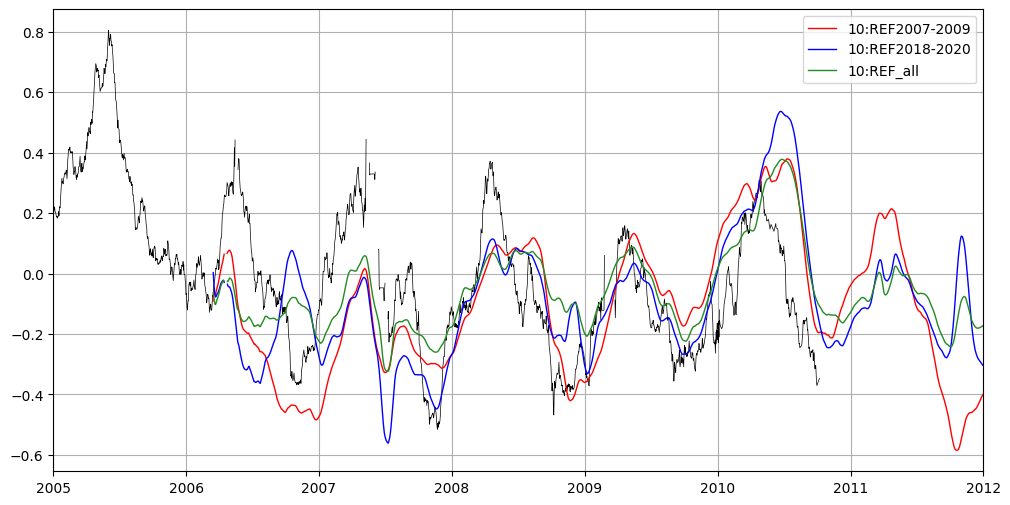

In [18]:
fig = plt.figure(figsize=(12,6))
#plt.scatter(cmu.index,cmu.demean,s=0.1,c='r')
plt.plot(cmu.index- timedelta(days=day/2),cmu.SMA_demean*20,lw=0.5,c='black')

plt.plot(CHTO10.index- timedelta(days=day/2),demean_common(CHTO10),lw=1,c='red',label ='10:REF2007-2009')
plt.plot(CHTO10_1.index- timedelta(days=day/2),demean_common(CHTO10_1),lw=1,c='blue',label ='10:REF2018-2020')
plt.plot(CHTO10_a.index- timedelta(days=day/2),demean_common(CHTO10_a),lw=1,c='forestgreen',label ='10:REF_all')

plt.legend()
plt.xlim(datetime(2005,1,1),datetime(2012,1,1))
#plt.ylim(-0.03,0.07)

'''
well ='G135'
color='lightblue'
gw,dd,ync = grundwater(well,gw_all)
plt.plot(dd, ync/100-0.045,color,linewidth=2,label='Groundwater level %s'%well,zorder=1)
plt.scatter(gw.index,gw/100-0.045, marker='x',color='k',s=25,
            linewidth=2,zorder=2)
well ='Q49'
color='navy'
gw,dd,ync = grundwater(well,gw_all)
plt.plot(dd, ync/100-0.045,color,linewidth=2,label='Groundwater level %s'%well,zorder=1)
plt.scatter(gw.index,gw/100-0.045, marker='x',color='k',s=25,
            linewidth=2,zorder=2)
'''
plt.grid()

KeyError: 'gwl'

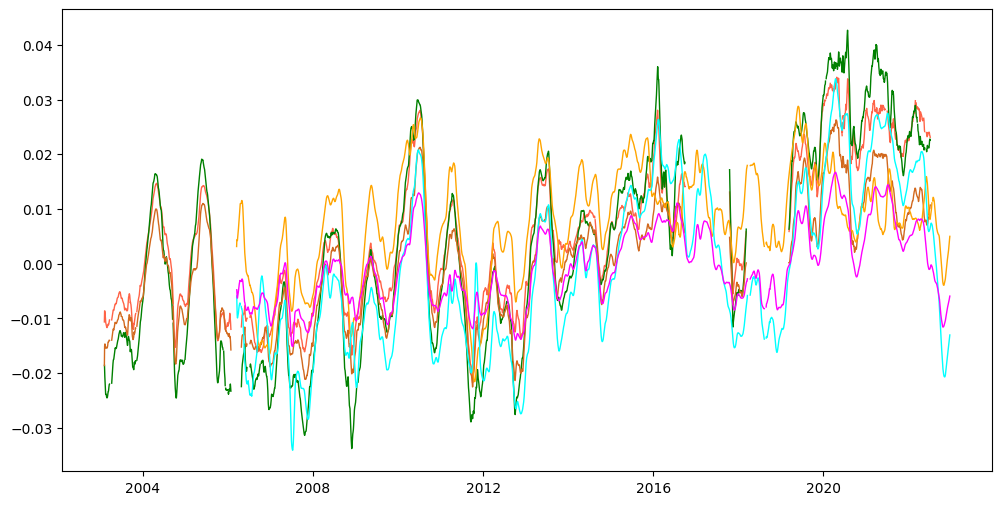

In [19]:
fig = plt.figure(figsize=(12,6))
#plt.scatter(cmu.index,cmu.demean,s=0.1,c='r')
#plt.plot(cmu.index- timedelta(days=day/2),cmu.SMA_demean,lw=1,c='k')
plt.plot(CHTO.index- timedelta(days=day/2),CHTO.SMA/25,lw=1,c='tomato')
plt.plot(CHTO2.index- timedelta(days=day/2),CHTO2.SMA/25,lw=1,c='g')
plt.plot(CHTO3.index- timedelta(days=day/2),CHTO3.SMA/25,lw=1,c='chocolate')
plt.plot(CHTO10.index- timedelta(days=day/2),CHTO10.SMA/20,lw=1,c='orange')
plt.plot(CHTO10_1.index- timedelta(days=day/2),CHTO10_1.SMA/20,lw=1,c='cyan')
plt.plot(CHTO10_a.index- timedelta(days=day/2),CHTO10_a.SMA/25,lw=1,c='magenta')
plt.plot(rain.date,rain['gwl']/80+0.03,color='red')
plt.xlim(datetime(2018,1,1),datetime(2023,1,1))
plt.ylim(-0.03,0.07)

'''
well ='G135'
color='lightblue'
gw,dd,ync = grundwater(well,gw_all)
plt.plot(dd, ync/100-0.045,color,linewidth=2,label='Groundwater level %s'%well,zorder=1)
plt.scatter(gw.index,gw/100-0.045, marker='x',color='k',s=25,
            linewidth=2,zorder=2)
well ='Q49'
color='navy'
gw,dd,ync = grundwater(well,gw_all)
plt.plot(dd, ync/100-0.045,color,linewidth=2,label='Groundwater level %s'%well,zorder=1)
plt.scatter(gw.index,gw/100-0.045, marker='x',color='k',s=25,
            linewidth=2,zorder=2)
'''
plt.grid()

In [ ]:
fig = plt.figure(figsize=(12,6))
#plt.scatter(cmu.index,cmu.demean,s=0.1,c='r')
plt.plot(cmu.index- timedelta(days=day/2),cmu.SMA_demean,lw=1,c='k')

plt.plot(CHTO10.index- timedelta(days=day/2),CHTO10.SMA/20+0.005,lw=1,c='orange')
plt.plot(CHTO10_1.index- timedelta(days=day/2),CHTO10_1.SMA/20+0.025,lw=1,c='magenta')
plt.scatter(Q49.index,Q49.Q49/100-0.025,s=3,c='b')
plt.scatter(G135.index,G135.G135/100-0.045,s=3,c='violet')
plt.xlim(datetime(2003,1,1),datetime(2023,1,1))
plt.ylim(-0.03,0.07)
plt.grid()